In [1]:
import pandas as pd
import numpy as np
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA,ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
stockFile = './stock.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0]).dropna()
stock

,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,IXIC,2657.389893,2665.899902,2641.979980,2648.719971,2648.719971,1636850000
2012-01-04,IXIC,2639.899902,2653.179932,2627.229980,2648.360107,2648.360107,1670530000
2012-01-05,IXIC,2642.570068,2673.560059,2631.229980,2669.860107,2669.860107,1836410000
2012-01-06,IXIC,2671.169922,2682.120117,2658.830078,2674.219971,2674.219971,1683090000
2012-01-09,IXIC,2682.979980,2683.780029,2662.959961,2676.560059,2676.560059,1768080000
...,...,...,...,...,...,...,...
2021-05-25,NSEI,15291.750000,15293.849610,15163.400390,15208.450200,15208.450200,441500
2021-05-26,NSEI,15257.049810,15319.900390,15194.950200,15301.450200,15301.450200,384000
2021-05-27,NSEI,15323.950200,15384.549810,15272.500000,15337.849610,15337.849610,0


## Portfolio

In [4]:
df = pd.read_csv("stock.csv", parse_dates=[0])
sn = df['Index'].unique()
df.index = df['Date']
df1 = df[df['Index']==sn[0]]
df2 = df[df['Index']==sn[1]]
df3 = df[df['Index']==sn[2]]
df1 = df1[["Close"]]
df2 = df2[["Close"]]
df3 = df3[["Close"]]
df1.rename(columns={'Close':sn[0]},inplace=True)
df2.rename(columns={'Close':sn[1]},inplace=True)
df3.rename(columns={'Close':sn[2]},inplace=True)
stock_price = pd.concat([df1,df2,df3],axis='columns',names=['Date']).dropna()
stock_return = stock_price.pct_change().dropna()
w=[0.50319022, 0.22285832, 0.27395146]
Portfolio = stock_return.mul(w, axis=1).sum(axis=1)

In [5]:
Portfolio

Date
2012-01-05    0.002243
2012-01-06   -0.001521
2012-01-10    0.011669
2012-01-11    0.002860
2012-01-12   -0.000729
                ...   
2021-05-24    0.007876
2021-05-25    0.001534
2021-05-26    0.005342
2021-05-27   -0.000136
2021-05-28    0.006890
Length: 2105, dtype: float64

                IXIC      N225      NSEI  Portfolio
Date                                               
2012-01-05  0.008118 -0.008341  0.000063   0.002243
2012-01-06  0.001633 -0.011587  0.000874  -0.001521
2012-01-10  0.010575  0.003803  0.020077   0.011669
2012-01-11  0.003056  0.003042  0.002351   0.002860
2012-01-12  0.005142 -0.007373 -0.006110  -0.000729


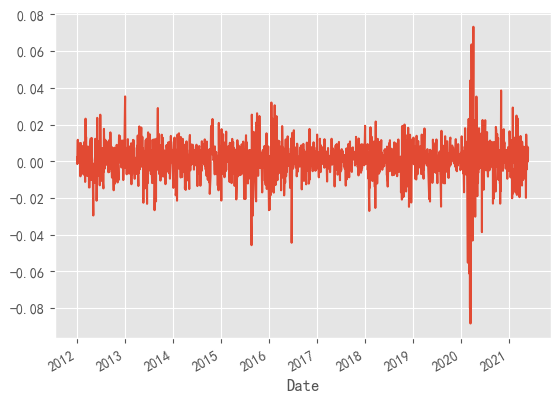

In [6]:
# 将收益率数据拷贝到新的变量 stock_return 中，这是为了后续调用的方便
stock_return = stock_return.copy()
 
# 设置组合权重，存储为numpy数组类型
portfolio_weights = np.array(w)
# 计算加权的股票收益
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)
# 计算投资组合的收益
stock_return['Portfolio'] = WeightedReturns.sum(axis=1)
# 打印前5行数据
print(stock_return.head())
 
# 绘制组合收益随时间变化的图
stock_return.Portfolio.plot()
plt.show()

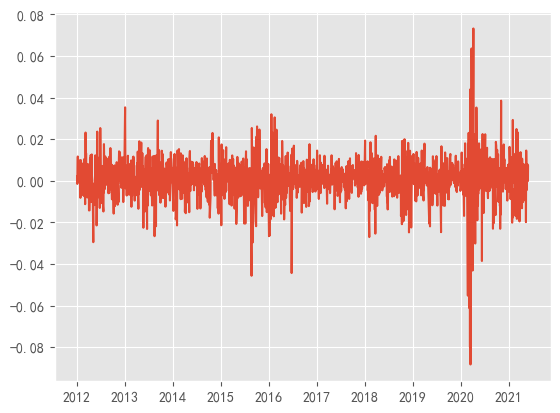

In [7]:
plt.plot(Portfolio)
plt.show()

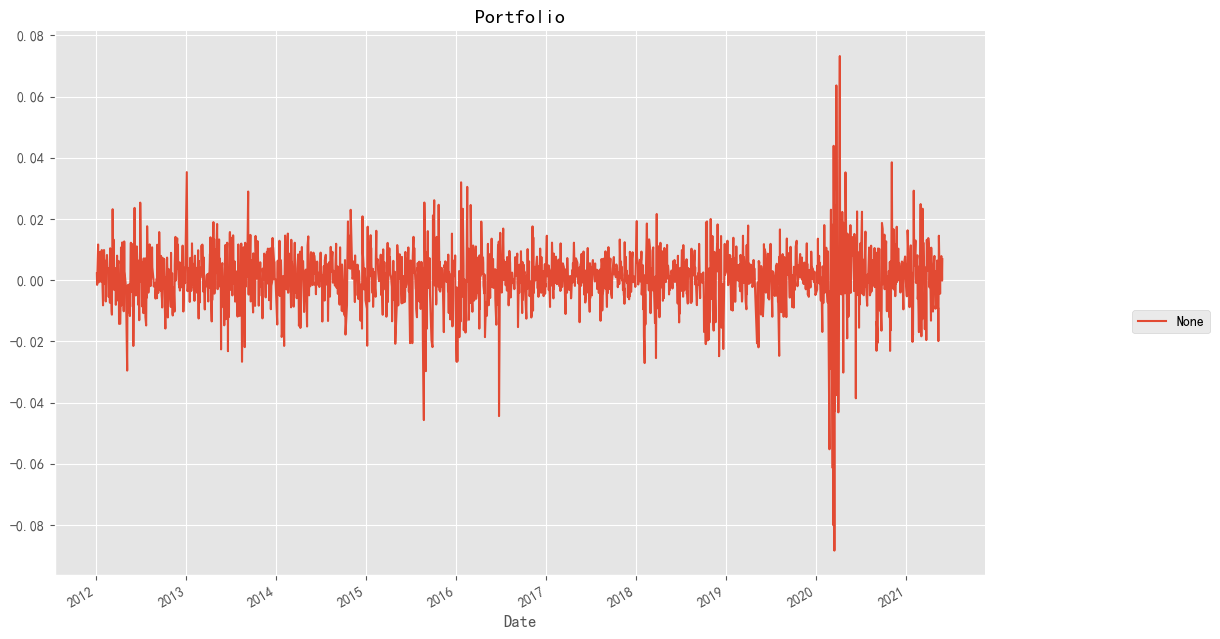

In [8]:
# 画图
Portfolio.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Portfolio")
sns.despine()
plt.show()

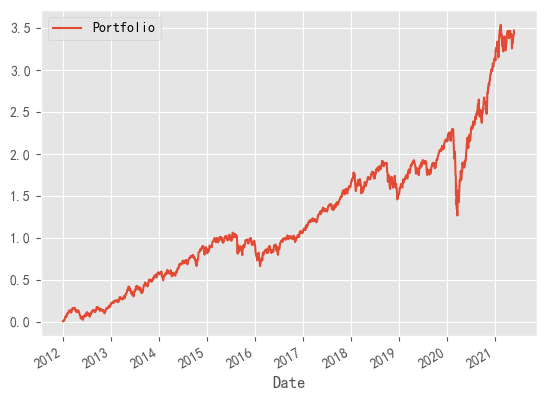

In [9]:
# 定义累积收益曲线绘制函数
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+stock_return[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.show()
# 计算累积的组合收益，并绘图
cumulative_returns_plot(['Portfolio'])

In [10]:
stock_return

,IXIC,N225,NSEI,Portfolio
Date,,,,
2012-01-05,0.008118,-0.008341,0.000063,0.002243
2012-01-06,0.001633,-0.011587,0.000874,-0.001521
2012-01-10,0.010575,0.003803,0.020077,0.011669
2012-01-11,0.003056,0.003042,0.002351,0.002860
2012-01-12,0.005142,-0.007373,-0.006110,-0.000729
...,...,...,...,...
2021-05-24,0.014118,0.001652,0.001476,0.007876
2021-05-25,-0.000293,0.006676,0.000707,0.001534
2021-05-26,0.005919,0.003089,0.006115,0.005342


In [12]:
'''df = pd.read_csv("stock.csv")
sn = df['Index'].unique()
df.index = df['Date']
df1 = df[df['Index']==sn[0]]
df2 = df[df['Index']==sn[1]]
df3 = df[df['Index']==sn[2]]
df1 = df1[["Close"]]
df2 = df2[["Close"]]
df3 = df3[["Close"]]
df1.rename(columns={'Close':sn[0]},inplace=True)
df2.rename(columns={'Close':sn[1]},inplace=True)
df3.rename(columns={'Close':sn[2]},inplace=True)
stock_price = pd.concat([df1,df2,df3],axis='columns',names=['Date']).dropna()
stock_return = stock_price.pct_change().dropna()'''

w1=np.array([0.48009107, 0.19022909, 0.3296799,0])
Portfolio1 = (stock_return.mul(w1, axis=1)).sum(axis=1)
stock_return
Portfolio1

Date
2012-01-05    0.002332
2012-01-06   -0.001132
2012-01-10    0.012420
2012-01-11    0.002821
2012-01-12   -0.000948
                ...   
2021-05-24    0.007579
2021-05-25    0.001363
2021-05-26    0.005445
2021-05-27    0.000105
2021-05-28    0.006538
Length: 2105, dtype: float64

                IXIC      N225      NSEI  Portfolio  Portfolio1
Date                                                           
2012-01-05  0.008118 -0.008341  0.000063   0.002243    0.002332
2012-01-06  0.001633 -0.011587  0.000874  -0.001521   -0.001132
2012-01-10  0.010575  0.003803  0.020077   0.011669    0.012420
2012-01-11  0.003056  0.003042  0.002351   0.002860    0.002821
2012-01-12  0.005142 -0.007373 -0.006110  -0.000729   -0.000948


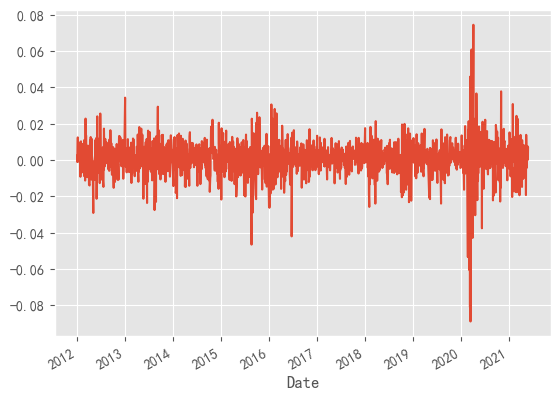

In [13]:
# 将收益率数据拷贝到新的变量 stock_return 中，这是为了后续调用的方便
#stock_return = stock_return.copy()
 
# 设置组合权重，存储为numpy数组类型
portfolio_weights1 = np.array([0.48009107, 0.19022909, 0.3296799])
# 计算加权的股票收益
#WeightedReturns1 = Portfolio1
# 计算投资组合的收益
stock_return['Portfolio1'] = Portfolio1
# 打印前5行数据
print(stock_return.head())
 
# 绘制组合收益随时间变化的图
stock_return.Portfolio1.plot()
plt.show()

In [14]:
# 定义累积收益曲线绘制函数
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+stock_return[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    #plt.legend()
    #plt.show()
    return CumulativeReturns
# 计算累积的组合收益，并绘图
p0=cumulative_returns_plot(['Portfolio'])
p0

Date
2012-01-05    0.002243
2012-01-06    0.000719
2012-01-10    0.012396
2012-01-11    0.015292
2012-01-12    0.014551
                ...   
2021-05-24    3.411554
2021-05-25    3.418323
2021-05-26    3.441925
2021-05-27    3.441319
2021-05-28    3.471920
Name: Portfolio, Length: 2105, dtype: float64

In [15]:
p1=cumulative_returns_plot(['Portfolio1'])
p1

Date
2012-01-05    0.002332
2012-01-06    0.001197
2012-01-10    0.013631
2012-01-11    0.016491
2012-01-12    0.015527
                ...   
2021-05-24    3.351209
2021-05-25    3.357138
2021-05-26    3.380863
2021-05-27    3.381324
2021-05-28    3.409971
Name: Portfolio1, Length: 2105, dtype: float64

## 投资组合时间序列

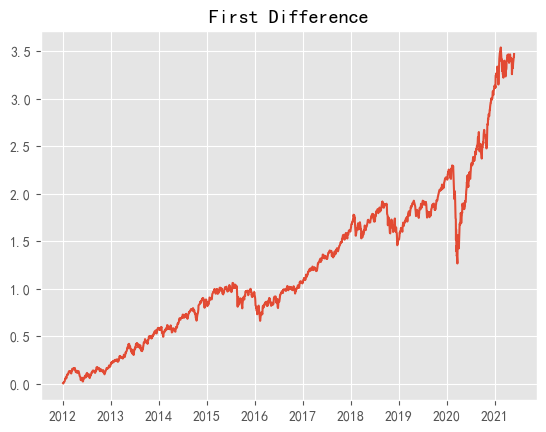

In [17]:
portfolio = p0
portfolio_diff = portfolio.diff()
portfolio_diff = portfolio.dropna()

#plt.figure()
plt.plot(portfolio_diff)
plt.title('First Difference')
plt.show()

In [18]:
portfolio = pd.DataFrame(p0)
#portfolio.index=['portfolio']
portfolio

,Portfolio
Date,
2012-01-05,0.002243
2012-01-06,0.000719
2012-01-10,0.012396
2012-01-11,0.015292
2012-01-12,0.014551
...,...
2021-05-24,3.411554
2021-05-25,3.418323
2021-05-26,3.441925


In [19]:
portfolio_week = portfolio['Portfolio'].resample('W-MON').mean()
portfolio_train = portfolio_week['2012':'2021']

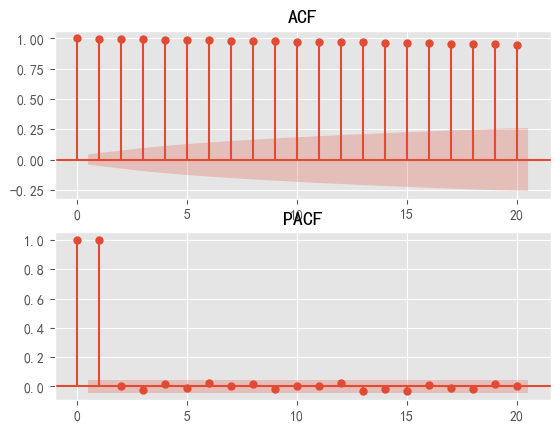

In [20]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
acf = plot_acf(portfolio_diff, lags=20,ax=ax1,title="ACF")
pacf = plot_pacf(portfolio_diff, lags=20,ax=ax2,title="PACF")
plt.show()

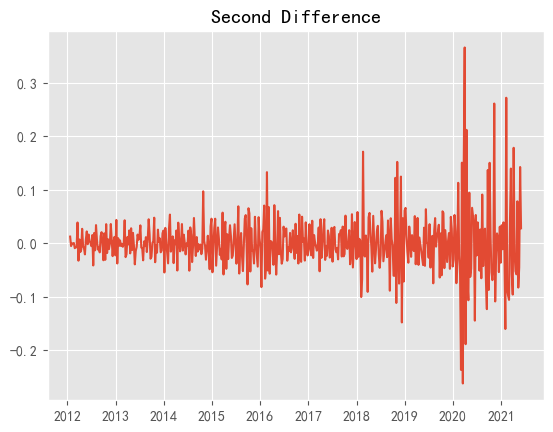

In [21]:
# second difference
portfolio_diff2 = portfolio_train.diff(1)    
portfolio_diff2 = portfolio_diff2.dropna()
for i in range(1):          
    portfolio_diff2 = portfolio_diff2.diff(1)
    portfolio_diff2 = portfolio_diff2.dropna()
plt.figure()
plt.plot(portfolio_diff2)
plt.title('Second Difference')
plt.show()

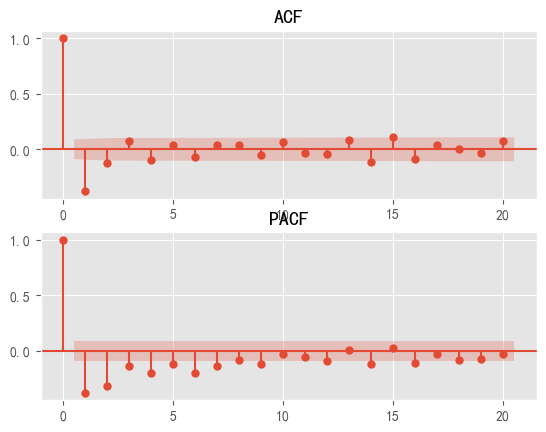

In [22]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
acf = plot_acf(portfolio_diff2, lags=20,ax=ax1,title="ACF")
pacf = plot_pacf(portfolio_diff2, lags=20,ax=ax2,title="PACF")
plt.show()

In [23]:
# q=2, p=9  pdq

In [24]:
import statsmodels.api as sm
import numpy as np
portfolio_train[np.isnan(portfolio_train)] = 0
portfolio_train[np.isinf(portfolio_train)] = 0

In [25]:
# train
modelp = ARIMA(portfolio_train, order=(9, 2, 2),freq='W-MON')
resultp = modelp.fit()

C:\Users\piika\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piika\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

Date
2020-09-07    2.480703
2020-09-14    2.458003
2020-09-21    2.459830
2020-09-28    2.446417
2020-10-05    2.451310
2020-10-12    2.457525
2020-10-19    2.463868
2020-10-26    2.490707
2020-11-02    2.501077
2020-11-09    2.538548
2020-11-16    2.559022
2020-11-23    2.596677
2020-11-30    2.631061
2020-12-07    2.662635
2020-12-14    2.708356
2020-12-21    2.734544
2020-12-28    2.782875
2021-01-04    2.809101
2021-01-11    2.849720
2021-01-18    2.880746
2021-01-25    2.907558
2021-02-01    2.942814
2021-02-08    2.957017
2021-02-15    2.990026
2021-02-22    2.998340
2021-03-01    3.020632
2021-03-08    3.030013
2021-03-15    3.036761
2021-03-22    3.049347
2021-03-29    3.042724
2021-04-05    3.054529
2021-04-12    3.042416
2021-04-19    3.046610
2021-04-26    3.037545
2021-05-03    3.029918
2021-05-10    3.027799
2021-05-17    3.010464
2021-05-24    3.012665
2021-05-31    2.993350
Freq: W-MON, dtype: float64


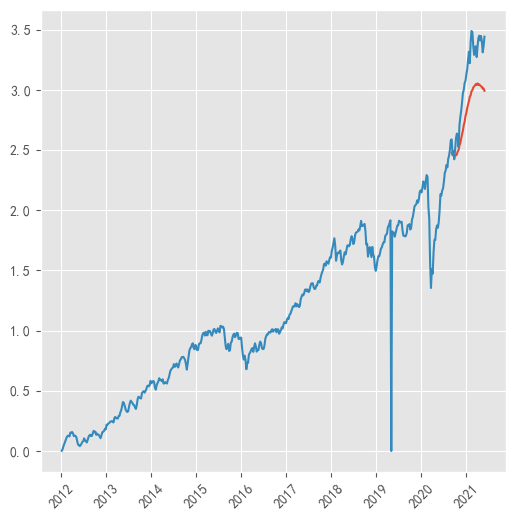

In [26]:
pred_portfolio = resultp.predict('2020/09', dynamic=True, typ='levels')

print (pred_portfolio)

plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred_portfolio)
plt.plot(portfolio_train)
plt.show()

## Portfolio1

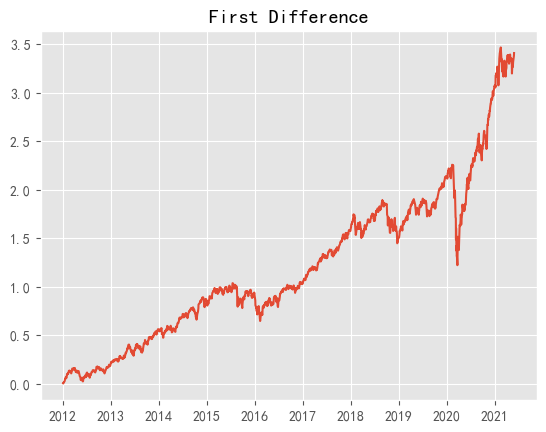

In [27]:
portfolio1 = p1
portfolio1_diff = portfolio1.diff()
portfolio1_diff = portfolio1.dropna()

#plt.figure()
plt.plot(portfolio1_diff)
plt.title('First Difference')
plt.show()

In [28]:
portfolio1 = pd.DataFrame(p1)
#portfolio.index=['portfolio']
portfolio1

,Portfolio1
Date,
2012-01-05,0.002332
2012-01-06,0.001197
2012-01-10,0.013631
2012-01-11,0.016491
2012-01-12,0.015527
...,...
2021-05-24,3.351209
2021-05-25,3.357138
2021-05-26,3.380863


In [29]:
portfolio1_week = portfolio1['Portfolio1'].resample('W-MON').mean()
portfolio1_train = portfolio1_week['2012':'2021']

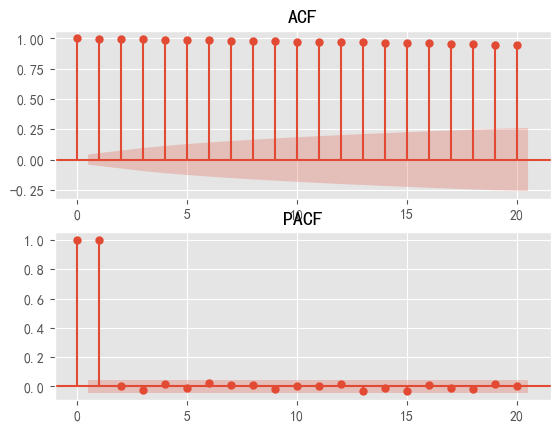

In [30]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
acf = plot_acf(portfolio1_diff, lags=20,ax=ax1,title="ACF")
pacf = plot_pacf(portfolio1_diff, lags=20,ax=ax2,title="PACF")
plt.show()

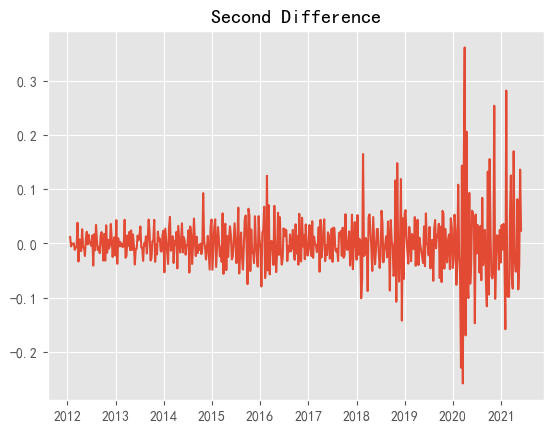

In [31]:
# second difference
portfolio1_diff2 = portfolio1_train.diff(1)    
portfolio1_diff2 = portfolio1_diff2.dropna()
for i in range(1):         
    portfolio1_diff2 = portfolio1_diff2.diff(1)
    portfolio1_diff2 = portfolio1_diff2.dropna()
plt.figure()
plt.plot(portfolio1_diff2)
plt.title('Second Difference')
plt.show()

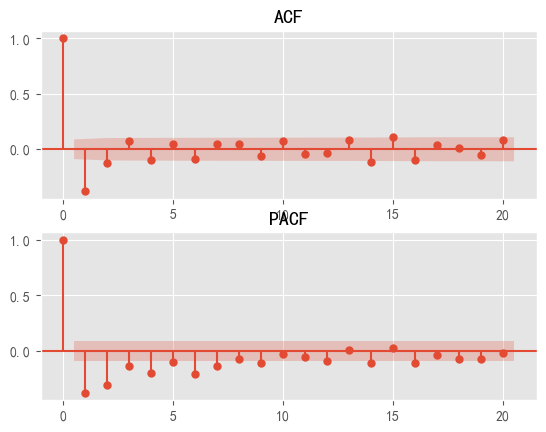

In [32]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
acf = plot_acf(portfolio1_diff2, lags=20,ax=ax1,title="ACF")
pacf = plot_pacf(portfolio1_diff2, lags=20,ax=ax2,title="PACF")
plt.show()

In [33]:
# q=2, p=9

In [34]:
import statsmodels.api as sm
import numpy as np
portfolio1_train[np.isnan(portfolio1_train)] = 0
portfolio1_train[np.isinf(portfolio1_train)] = 0

In [35]:
# train
modelp1 = ARIMA(portfolio1_train, order=(9, 1, 2),freq='W-MON')
resultp1 = modelp1.fit()

C:\Users\piika\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piika\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

Date
2020-12-07    2.801203
2020-12-14    2.825271
2020-12-21    2.842098
2020-12-28    2.855045
2021-01-04    2.872616
2021-01-11    2.883492
2021-01-18    2.890671
2021-01-25    2.893938
2021-02-01    2.890656
2021-02-08    2.885513
2021-02-15    2.877716
2021-02-22    2.868419
2021-03-01    2.858884
2021-03-08    2.849797
2021-03-15    2.842233
2021-03-22    2.836990
2021-03-29    2.834676
2021-04-05    2.835906
2021-04-12    2.840917
2021-04-19    2.849767
2021-04-26    2.862279
2021-05-03    2.878044
2021-05-10    2.896476
2021-05-17    2.916829
2021-05-24    2.938255
2021-05-31    2.959860
Freq: W-MON, dtype: float64


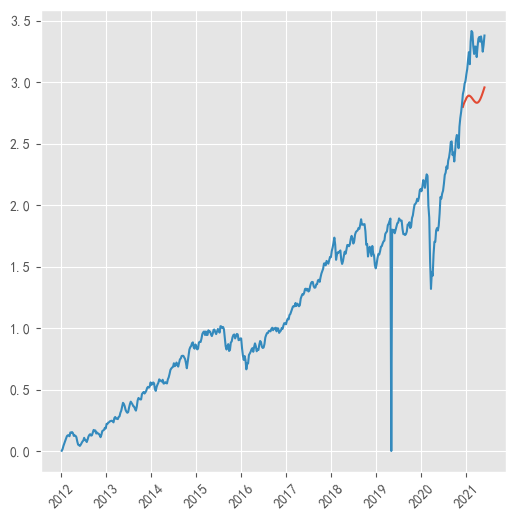

In [37]:
pred_portfolio1 = resultp1.predict('2020/09', dynamic=True, typ='levels')

print (pred_portfolio1)

plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred_portfolio1)
plt.plot(portfolio1_train)
plt.show()